In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Distance euclidienne

In [45]:
data1=pd.read_csv('data/data_tp1_app.txt',names=['y','x1','x2'],sep=" ")

In [46]:
def calcul_moyenne(X):
    return np.array([np.array(X[X['y']==i][['x1','x2']].mean()) for i in range(1,6)])

In [47]:
def calcul_cov(X):
     return np.array([np.cov(np.array(X[X['y']==i][['x1','x2']]).T) for i in range(1,6)])

In [202]:
u=calcul_moyenne(data1)
cov=calcul_cov(data1)

In [158]:
def predi_distance_euclidien(x):
    dist=[np.linalg.norm(x-u[i]) for i in range(5)]
    return np.argmin(dist)+1,dist

In [165]:
def predi_distance_mahanalobis(x):
     dist=[(x-u[i]).T@np.linalg.inv(cov[i])@(x-u[i])+np.log(np.linalg.det(cov[i])) for i in range(5)]
     return np.argmin(dist)+1,dist

In [166]:
test=pd.read_csv('data/data_tp1_dec.txt',names=['y','x1','x2'],sep=" ")

In [171]:
def plot_decision_multi(x1_min, x1_max, x2_min, x2_max, prediction, sample = 300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction(np.array([x1,x2]))[0] for x1 in x1_list] for x2 in x2_list] 
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)

In [172]:
def visualisation(data,methode):
    test=data[['x1','x2']]
    y_pred=[methode(i)[0] for i in test.values.tolist()]
    test['y_predi']=y_pred
    for label in range(1,6):
        plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
    plt.legend()
    plot_decision_multi(test['x1'].min(),test['x1'].max(),predi['x2'].min(),test['x2'].max(),prediction=methode)
    plt.axis('equal')
    plt.show()

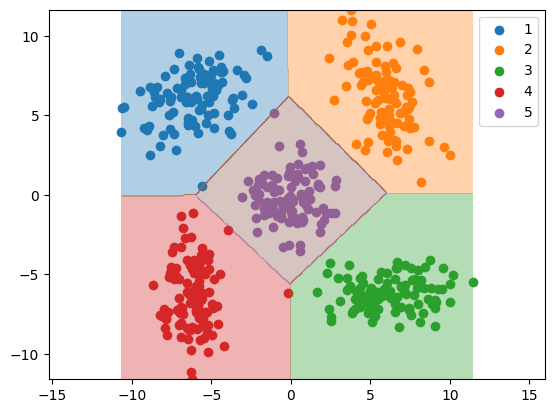

In [173]:
visualisation(test,predi_distance_euclidien)

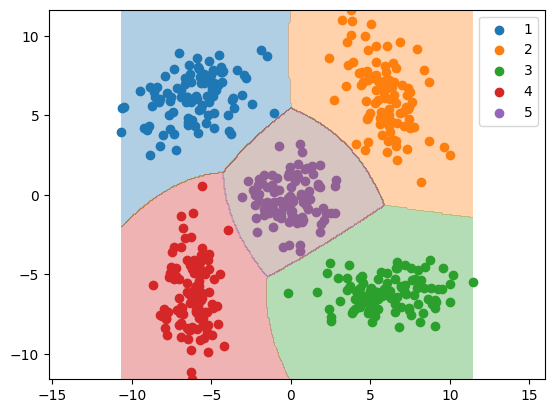

In [103]:
visualisation(test,predi_distance_mahanalobis)

In [199]:
def calcul_matrice(test,methode):
  y=list(test['y'])
  y_pred=[methode(k)[0] for k in test[['x1','x2']].values.tolist()]  
  matrice=[[sum([1 if y_pred[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
  errer=sum([1 if y_pred[i]==y[i] else 0 for i in range(len(y))])/len(y)
  return matrice,errer

In [200]:
calcul_matrice(test,predi_distance_euclidien)

([[98, 0, 0, 0, 1],
  [0, 100, 0, 0, 0],
  [0, 0, 99, 0, 0],
  [0, 0, 1, 100, 0],
  [2, 0, 0, 0, 99]],
 0.992)

In [201]:
calcul_matrice(test,predi_distance_mahanalobis)

([[99, 0, 0, 0, 0],
  [0, 100, 0, 0, 0],
  [0, 0, 100, 0, 0],
  [0, 0, 0, 100, 1],
  [1, 0, 0, 0, 99]],
 0.996)

# Dataset 2

In [203]:
data2=pd.read_csv('data/data_tp2_app.txt',names=['y','x1','x2'],sep=" ")
test2=pd.read_csv('data/data_tp2_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data2)
cov=calcul_cov(data2)

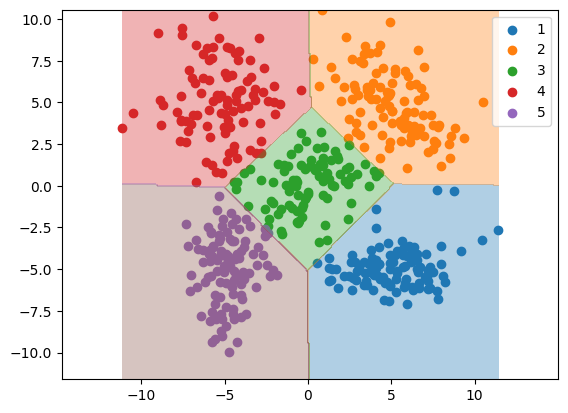

In [135]:
visualisation(test2,predi_distance_euclidien)

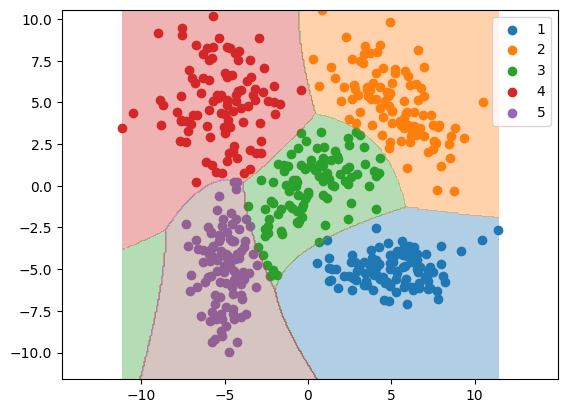

In [138]:
visualisation(test2,predi_distance_mahanalobis)

In [204]:
calcul_matrice(test2,predi_distance_euclidien)

([[100, 2, 0, 0, 0],
  [0, 97, 5, 0, 0],
  [0, 1, 84, 6, 2],
  [0, 0, 1, 94, 0],
  [0, 0, 10, 0, 98]],
 0.946)

In [205]:
calcul_matrice(test2,predi_distance_mahanalobis)

([[99, 0, 1, 0, 0],
  [0, 95, 4, 0, 0],
  [1, 5, 88, 3, 5],
  [0, 0, 1, 96, 0],
  [0, 0, 6, 1, 95]],
 0.946)

# Dataset 3

In [206]:
data3=pd.read_csv('data/data_tp3_app.txt',names=['y','x1','x2'],sep=" ")
test3=pd.read_csv('data/data_tp3_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data3)
cov=calcul_cov(data3)

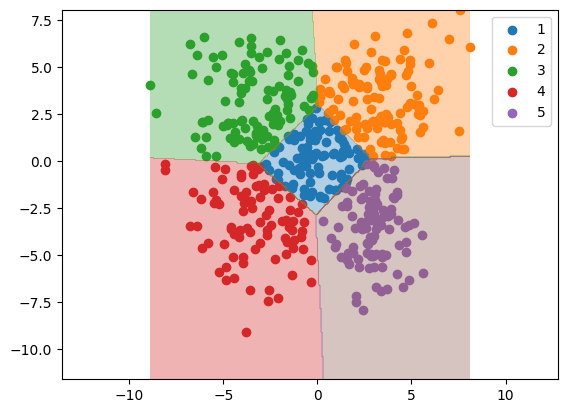

In [156]:
visualisation(test3,predi_distance_euclidien)

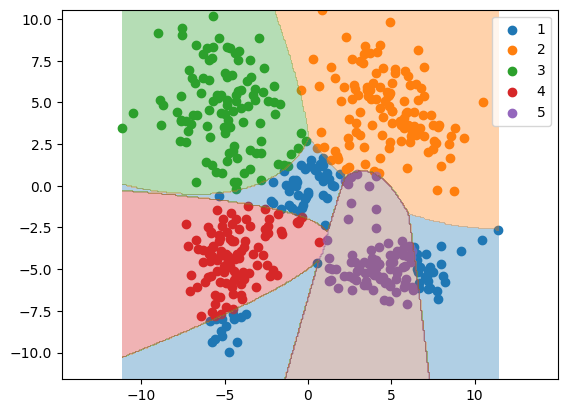

In [157]:
visualisation(test2,predi_distance_mahanalobis)

In [207]:
calcul_matrice(test3,predi_distance_euclidien)

([[43, 12, 16, 16, 5],
  [17, 83, 4, 0, 9],
  [16, 3, 78, 7, 0],
  [12, 0, 2, 74, 0],
  [12, 2, 0, 3, 86]],
 0.728)

In [208]:
calcul_matrice(test3,predi_distance_mahanalobis)

([[38, 7, 14, 29, 5],
  [20, 83, 4, 0, 7],
  [17, 5, 81, 10, 0],
  [12, 0, 1, 59, 0],
  [13, 5, 0, 2, 88]],
 0.698)

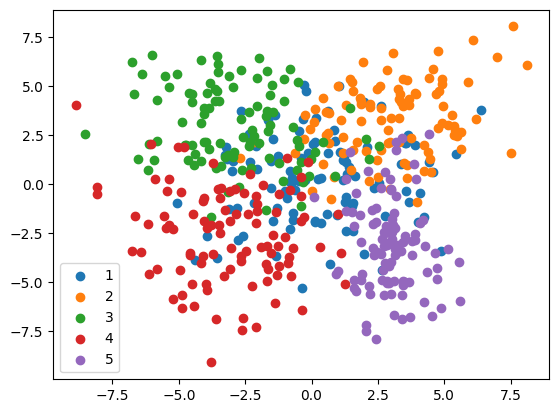

In [148]:
for label in range(1,6):
    plt.scatter(test3[test3['y']== label]['x1'], test3[test3['y']== label]['x2'], label=label)
plt.legend()

500